<h1>Unit 4 Part 1 Live Session: Discrete Random Variables </center> </h1>
<h2> W203 Instructional Team </h2>

<h2> Random Variables </h2>

<img src="https://drive.google.com/uc?id=1TD74lgT93dFL02NxTMI2VAF27IpkZhMO">
    

<h3> 0.1 Class Announcements </h3>
1. Announcement 1
2. Announcement 2

<h3> 1 Random Variables Group Discussion </h3>

** Experiment: ** You have written the letters A through G on 7 separate slips of paper and put them in a hat. After you have mixed up those piece of paper you ask someone to close their eyes and blindly choose one slip of paper out of the hat. The person then shows you the slip of paper with which you generate a number according to the following. 

$$ 
X = 
\begin{cases} 
    1 &  \text{if shown  A } \\
    10 & \text{if shown B or C } \\
    20 & \text{if shown D or E or F } \\
    2  & \text{if shown  G }
\end{cases}
$$



**1.1** Is $X$ a random variable? If so how would you further categorize it? Either way, give a definition of what a random variable is to you. 

X is a discrete random variable
The value changes based on the outcome

The selection of which piece of paper is the random part

**1.2** Suppose you then define $Y = X^2$, is $Y$ a random variable? How about any real valued function $f(X)$? Is your definition too narrow to include $Y$ and/or $f(X)$? What about $f(X) = 1$ for all values of $X$.

Y is a random variable
f(X) is a random variable

Remember the following picture:

<img src="https://drive.google.com/uc?id=14IaN5dxxV4-iY5USN6XTrum7vlybXfEJ">

**1.3** Where does the randomness in a random variable come from?

**1.4** If you select a person at random from the US population and measure their blood pressure, what does $\Omega$ represent?  What does $w$ represent?  What is the random variable?

Omega represents all the blood pressure and all the people in the united states. 
Function of the person, w, resulting in a blood pressure reading, the random variable.
Operationalizion based on a random draw and whatever you've operationalized. However you measured the phenomenmo


<h3> 2 Modeling A Fair Die </h3>

The range of a discrete random variable is a discrete set of real numbers, $O$.  Much of the time, the range will simply be a finite set of numbers. For any value k in the range, $0 \leq P(X=k) \leq 1$. The sum over all values k in the range is 1, i.e. $\sum_{k \in O} P(X=k)=1$.

The expected value (or population mean) of a discrete random variable X is the weighted average of the values in the range of X.
$$E(X) = \sum_{k \in O} k \cdot P(X=k)$$

One very useful feature of R is its ability to generate random numbers from a wide variety of distributions.

**2.1** How can we represent a fair (six-sided) die in R? Do so (Hint: ?sample) 

In [17]:
outcomes<-c(1:6)
prob<-rep(1/6,6)
x<-sample(outcomes, size=10, prob=prob, replace=TRUE)

[1] 3 1 1 3 6 1 4 2 5 6

In [18]:
#manually
E_X=(1*(1/6)+2*(1/6)+3*(1/6)+4*(1/6)+5*(1/6)+6*(1/6))
E_X

[1] 3.5

**2.2** Let the $X$ represent the result of one role of a 6 sided die.  Think of the formula for $E(X)$ and use R to evaluate it.

In [19]:
sum(outcomes*prob)

[1] 3.5

**2.3** Let $Y$ be the random variable given by $X^2$.  Think of the formula for $E(Y)$ and use R to evaluate it.

In [21]:
E_Y=sum(outcomes**2*prob)
E_Y

[1] 15.16667

**2.4** Using your previous two answers, use R to compute $var(X)$.

$$Var(X)=E(X^2)-[E(X)^2]$$

In [23]:
var_x=E_Y-E_X^2
var_x

[1] 2.916667

**2.5** Simulate rolling the die 10 times, plot the result, and compute the sample mean. (Hint: ?sample)

[1] "sample mean: 3.4"

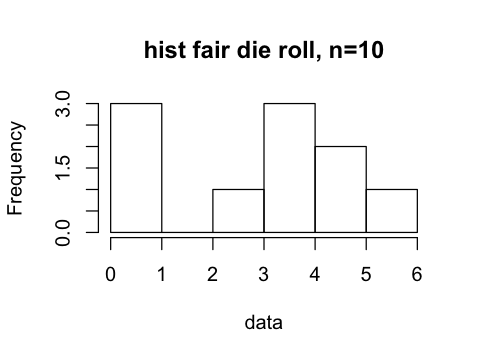

In [39]:
#make the plot smaller
options(repr.plot.width=4, repr.plot.height=3)

outcomes<-c(1:6)
probs<-rep(1/6, 6)
n=10
data= sample(outcomes, size=n, replace=T, prob=probs)
hist(data, breaks=(0:6), main="hist fair die roll, n=10")

paste('sample mean:', mean(data))

**2.6** Simulate rolling the die 1000 times, plot the result, and compute the sample mean.

[1] "sample mean: 3.513"

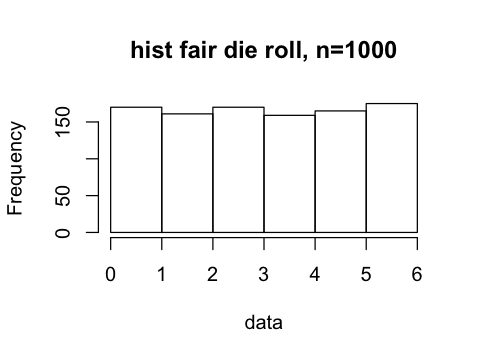

In [38]:
#make the plot smaller
options(repr.plot.width=4, repr.plot.height=3)

outcomes<-c(1:6)
probs<-rep(1/6, 6)
n=1000
data= sample(outcomes, size=n, replace=T, prob=probs)
hist(data, breaks=(0:6), main="hist fair die roll, n=1000")

paste('sample mean:', mean(data))

**2.7** Compare the result of 2.3 with the results of 2.4.  Which mean value is closer to $E(X)$?

In [62]:
#""" draw dample n and get distance from expecttion 3.5"""
expect=3.5
prob=rep(1/6,6)
outcomes=c(1:6)
n=10

draw_smpls<-function(prob, outcomes, n, expect){
    delta=mean(sample(outcomes, size=n, replace=T, prob = prob))-expect
    }

data=rep(0,300)

for(i in 1:300) {
    draw_smpls(prob, outcomes, i, expect)
    }

plot(data, type='l', main=expression(paste("convergence of " (bar(X)[n]-[E])) ), xlab="sample size"))

ERROR: Error in parse(text = x, srcfile = src): <text>:17:73: unexpected '['
16: 
17: plot(data, type='l', main=expression(paste("convergence of " (bar(X)[n]-[
                                                                            ^


<h3> 3 Expectation is Linear </h3>

Remember that for a random variable $X$ and constants $a$ and $b$, $E(aX + b) = aE(X) + b$

Later, we'll also see that for two random variables $X$ and $Y$, $E(X + Y) = E(X) + E(Y)$.

Linearity is a very powerful property.  Using it can often make your solutions much cleaner.

Say you want to find the expectation of a symmetric variable, $X$.  For example, here's a random variable that's symmetric around 5.

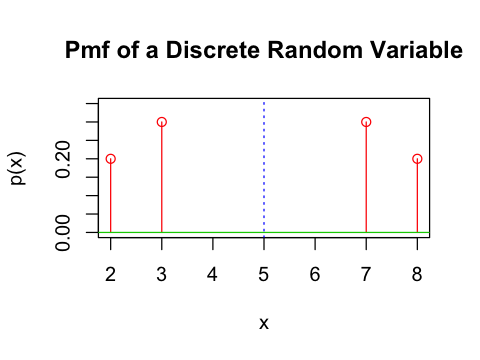

In [15]:
options(repr.plot.width=4, repr.plot.height=3)
plot(c(2,3,7,8),c(.2,.3,.3,.2),type="h",col=2,main="Pmf of a Discrete Random Variable",xlab="x",ylab="p(x)",ylim=c(0,.35))
points(c(2,3,7,8),c(.2,.3,.3,.2),col=2)
abline(h=0,col=3)
abline(v=5,col=4, lty=3)

$$E(x) = E(10-X)$$

$$E(x) - 10-E(x)$$

$$2E(x) = 10$$

$$E(x) = 5$$


In [ ]:
10*abs(1-.1*x)

10-X

To find the expectation, you could write the expectation as a sum in terms of the pmf, and then break the sum up into two sums... but it gets a bit messy.

Instead, you can try to apply linearity.  First, think of a function, $f$, such that $f(X)$ is another random variable with the exact same pmf as $X$.

$E(aX+b) = aE(X)+b$

Now, write the equation that says that the expectation of $X$ and $f(X)$ are the same, and simplify it.

<h3>4 Simulation

**4.1** In what ways are simulations useful to a data scientist?

**4.2** A binomial variable can be used to model a set of independent trials.  Say that you have a coin that lands heads with probability $p$.  You flip the coin $n$ times.  A binomial variable with parameters $n$ and $p$ is defined as the number of heads out of the $n$ flips.

Use R to simulate the $100$ flips for a coin with $p=.3$ and output the number of heads.

In [68]:
p=.3
outcomes=c(1,0)
n=100

x=sample(outcomes, size=n, replace=T, prob=c(p, 1-p))
print('head count')
head_count=sum(x)
head_count

[1] "head count"


[1] 29

**4.3** You have just taken a single draw from your random variable.  If you want to see what the distribution of your variable looks like, one idea is to simulate many draws.

Use R to repeat the simulation 1000 times and store the value of the random variable each time.  Plot a histogram of your result.

You may want to use the replicate function, which is shown below.

In [17]:
replicate(10, sample(c("H","T"),1))

[1] "T" "H" "T" "H" "T" "H" "T" "H" "T" "T"

**4.4** In this case, you could have also used R's dbinom to get the exact distribution you want:

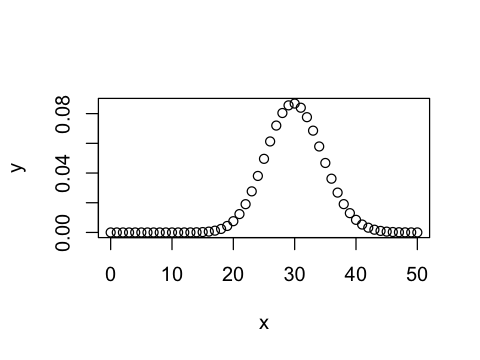

In [72]:
x = seq(0,50,by=1)
y = dbinom(x, size = 100,prob=.3)
plot(x,y)

Plot the above distribution.  What other famouse distribution does it remind you of?

In [ ]:
This is generating a normal distribution, which is somewhat suprising since this

**4.5** Since it was easy to get the exact distribution in this case, simulation wasn't really needed.  Give an example of a situation in which you really do need simulation to visualize a distribution.

In [ ]:
#when you don't have a lot of data and you resample from a current data set
#when you don't have a sufficent amount of data, when you want to test against a th